# 1.0 An end-to-end classification problem (Part I)



## 1.1 Dataset description

The dataset used in this project is based on listings for renting on **AirBnB** in the **Rio de Janeiro** extracted by Inside AirBnB. The data is from **December, 2021** and contains information on house's "bedrooms", bathrooms, "latitude", "longitude", "accommodates", "host_response_rate", and more. What we want to predict is **the price of Rio AirBnB rentals**.

Here's a direct link to that [dataset](https://drive.google.com/file/d/16zF4MHEP_bBxAEWpQgVocPupTjRRAgfP/view?usp=sharing).

Let's take the following steps:

1. Load Libraries
2. Fetch Data, including EDA
3. Pre-procesing
4. Data Segregation

<center><img width="600" src="https://drive.google.com/uc?export=view&id=1a-nyAPNPiVh-Xb2Pu2t2p-BhSvHJS0pO"></center>

## 1.2 Load libraries

In [70]:
import wandb
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from pandas_profiling import ProfileReport
from sklearn.model_selection import train_test_split
import tempfile
import os

## 1.3 Get data & Exploratory Data Analysis (EDA)

### 1.3.1 Create the raw_data artifact

In [71]:
# importing the dataset
data = pd.read_csv("listings.csv")
data.head()

id                         listing_url       scrape_id last_scraped  \
0  17878  https://www.airbnb.com/rooms/17878  20211224070558   2021-12-25   
1  24480  https://www.airbnb.com/rooms/24480  20211224070558   2021-12-25   
2  25026  https://www.airbnb.com/rooms/25026  20211224070558   2021-12-25   
3  35636  https://www.airbnb.com/rooms/35636  20211224070558   2021-12-26   
4  35764  https://www.airbnb.com/rooms/35764  20211224070558   2021-12-25   

                                                name  \
0  Very Nice 2Br in Copacabana w. balcony, fast WiFi   
1   Nice and cozy near Ipanema Beach, w/ home office   
2          Beautiful Modern Decorated Studio in Copa   
3                   Cosy flat close to Ipanema beach   
4     COPACABANA SEA BREEZE  -  RIO - 20 X Superhost   

                                         description  \
0  Discounts for long term stays. <br />- Large b...   
1  My studio is located in the best of Ipanema, t...   
2  Our apartment is a little gem, everyone loves ...   
3  This cosy apartment  is just a few steps away ...   
4  Our newly renovated studio is located in the b...   

                               neighborhood_overview  \
0  This is the one of the bests spots in Rio. Bec...   
1  The beach, the lagoon, Ipanema is a great loca...   
2  Copacabana is a lively neighborhood and the ap...   
3  The  apartment street is very quiet and safe ....   
4  Our guests will experience living with a local...   

                                         picture_url  host_id  \
0  https://a0.muscache.com/pictures/65320518/3069...    68997   
1  https://a0.muscache.com/pictures/11955612/b28e...    99249   
2  https://a0.muscache.com/pictures/3003965/68ebb...   102840   
3  https://a0.muscache.com/pictures/20009355/38b6...   153232   
4  https://a0.muscache.com/pictures/23782972/1d3e...   153691   

                                   host_url  ... review_scores_communication  \
0   https://www.airbnb.com/users/show/68997  ...                        4.90   
1   https://www.airbnb.com/users/show/99249  ...                        4.90   
2  https://www.airbnb.com/users/show/102840  ...                        4.90   
3  https://www.airbnb.com/users/show/153232  ...                        4.88   
4  https://www.airbnb.com/users/show/153691  ...                        4.94   

  review_scores_location review_scores_value license instant_bookable  \
0                   4.76                4.66     NaN                f   
1                   4.97                4.58     NaN                f   
2                   4.81                4.56     NaN                f   
3                   4.90                4.65     NaN                f   
4                   4.94                4.87     NaN                f   

  calculated_host_listings_count calculated_host_listings_count_entire_homes  \
0                              1                                           1   
1                              1                                           1   
2                              1                                           1   
3                              1                                           1   
4                              1                                           1   

  calculated_host_listings_count_private_rooms  \
0                                            0   
1                                            0   
2                                            0   
3                                            0   
4                                            0   

  calculated_host_listings_count_shared_rooms reviews_per_month  
0                                           0              1.92  
1                                           0              0.62  
2                                           0              1.69  
3                                           0              1.82  
4                                           0              2.76  

[5 rows x 74 columns]

In [72]:
data.shape

(24549, 74)

In [73]:
data.to_csv("raw_data.csv",index=False)

In [6]:
# Login to Weights & Biases
wandb.login(relogin=True)

wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize


wandb: Paste an API key from your profile and hit enter, or press ctrl+c to quit:  ········································


wandb: Appending key for api.wandb.ai to your netrc file: /Users/yolandademacedodantas/.netrc


True

In [10]:
# Send the raw_data.csv to the Wandb storing it as an artifact
!wandb artifact put \
      --name week08_eda/raw_data.csv \
      --type raw_data \
      --description "The raw data from Rio AirBnB listings" raw_data.csv

wandb: Uploading file raw_data.csv to: "yolanda/week08_eda/raw_data.csv:latest" (raw_data)
wandb: Currently logged in as: yolanda. Use `wandb login --relogin` to force relogin
wandb: wandb version 0.12.21 is available!  To upgrade, please run:
wandb:  $ pip install wandb --upgrade
wandb: Tracking run with wandb version 0.12.18
wandb: Run data is saved locally in /Users/yolandademacedodantas/Documents/PES/MLOps/semana-8/wandb/run-20220710_192759-380kgpfd
wandb: Run `wandb offline` to turn off syncing.
wandb: Syncing run earnest-sky-1
wandb: ⭐️ View project at https://wandb.ai/yolanda/week08_eda
wandb: 🚀 View run at https://wandb.ai/yolanda/week08_eda/runs/380kgpfd
Artifact uploaded, use this artifact in a run by adding:

    artifact = run.use_artifact("yolanda/week08_eda/raw_data.csv:latest")

wandb: Waiting for W&B process to finish... (success).
wandb:                                                                                
wandb: Synced earnest-sky-1: https://wandb.ai/yolanda

### 1.3.2 Download raw_data artifact from Wandb

In [11]:
# save_code tracking all changes of the notebook and sync with Wandb
run = wandb.init(project="week08_eda", save_code=True)

wandb: Currently logged in as: yolanda. Use `wandb login --relogin` to force relogin


In [12]:
# donwload the latest version of artifact raw_data.csv
artifact = run.use_artifact("week_08_eda/raw_data.csv:latest")

# create a dataframe from the artifact
df = pd.read_csv(artifact.file())

In [13]:
df.head()

id                         listing_url       scrape_id last_scraped  \
0  17878  https://www.airbnb.com/rooms/17878  20211224070558   2021-12-25   
1  24480  https://www.airbnb.com/rooms/24480  20211224070558   2021-12-25   
2  25026  https://www.airbnb.com/rooms/25026  20211224070558   2021-12-25   
3  35636  https://www.airbnb.com/rooms/35636  20211224070558   2021-12-26   
4  35764  https://www.airbnb.com/rooms/35764  20211224070558   2021-12-25   

                                                name  \
0  Very Nice 2Br in Copacabana w. balcony, fast WiFi   
1   Nice and cozy near Ipanema Beach, w/ home office   
2          Beautiful Modern Decorated Studio in Copa   
3                   Cosy flat close to Ipanema beach   
4     COPACABANA SEA BREEZE  -  RIO - 20 X Superhost   

                                         description  \
0  Discounts for long term stays. <br />- Large b...   
1  My studio is located in the best of Ipanema, t...   
2  Our apartment is a little gem, everyone loves ...   
3  This cosy apartment  is just a few steps away ...   
4  Our newly renovated studio is located in the b...   

                               neighborhood_overview  \
0  This is the one of the bests spots in Rio. Bec...   
1  The beach, the lagoon, Ipanema is a great loca...   
2  Copacabana is a lively neighborhood and the ap...   
3  The  apartment street is very quiet and safe ....   
4  Our guests will experience living with a local...   

                                         picture_url  host_id  \
0  https://a0.muscache.com/pictures/65320518/3069...    68997   
1  https://a0.muscache.com/pictures/11955612/b28e...    99249   
2  https://a0.muscache.com/pictures/3003965/68ebb...   102840   
3  https://a0.muscache.com/pictures/20009355/38b6...   153232   
4  https://a0.muscache.com/pictures/23782972/1d3e...   153691   

                                   host_url  ... review_scores_communication  \
0   https://www.airbnb.com/users/show/68997  ...                        4.90   
1   https://www.airbnb.com/users/show/99249  ...                        4.90   
2  https://www.airbnb.com/users/show/102840  ...                        4.90   
3  https://www.airbnb.com/users/show/153232  ...                        4.88   
4  https://www.airbnb.com/users/show/153691  ...                        4.94   

  review_scores_location review_scores_value license instant_bookable  \
0                   4.76                4.66     NaN                f   
1                   4.97                4.58     NaN                f   
2                   4.81                4.56     NaN                f   
3                   4.90                4.65     NaN                f   
4                   4.94                4.87     NaN                f   

  calculated_host_listings_count calculated_host_listings_count_entire_homes  \
0                              1                                           1   
1                              1                                           1   
2                              1                                           1   
3                              1                                           1   
4                              1                                           1   

  calculated_host_listings_count_private_rooms  \
0                                            0   
1                                            0   
2                                            0   
3                                            0   
4                                            0   

  calculated_host_listings_count_shared_rooms reviews_per_month  
0                                           0              1.92  
1                                           0              0.62  
2                                           0              1.69  
3                                           0              1.82  
4                                           0              2.76  

[5 rows x 74 columns]

### 1.3.3 Selecting features

In [74]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24549 entries, 0 to 24548
Data columns (total 74 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            24549 non-null  int64  
 1   listing_url                                   24549 non-null  object 
 2   scrape_id                                     24549 non-null  int64  
 3   last_scraped                                  24549 non-null  object 
 4   name                                          24528 non-null  object 
 5   description                                   23336 non-null  object 
 6   neighborhood_overview                         13212 non-null  object 
 7   picture_url                                   24549 non-null  object 
 8   host_id                                       24549 non-null  int64  
 9   host_url                                      24549 non-null 

There are many empty/null cells ^^^

In [43]:
df.describe()

id     scrape_id       host_id  host_listings_count  \
count  2.454900e+04  2.454900e+04  2.454900e+04         24534.000000   
mean   2.871856e+07  2.021122e+13  1.113764e+08             8.311771   
std    1.779452e+07  0.000000e+00  1.217497e+08            30.577741   
min    1.787800e+04  2.021122e+13  3.607000e+03             0.000000   
25%    1.316719e+07  2.021122e+13  1.476609e+07             1.000000   
50%    3.064572e+07  2.021122e+13  6.394434e+07             1.000000   
75%    4.581362e+07  2.021122e+13  1.691091e+08             4.000000   
max    5.396781e+07  2.021122e+13  4.370829e+08           666.000000   

       host_total_listings_count  neighbourhood_group_cleansed      latitude  \
count               24534.000000                           0.0  24549.000000   
mean                    8.311771                           NaN    -22.966484   
std                    30.577741                           NaN      0.035107   
min                     0.000000                           NaN    -23.072670   
25%                     1.000000                           NaN    -22.984730   
50%                     1.000000                           NaN    -22.972390   
75%                     4.000000                           NaN    -22.953280   
max                   666.000000                           NaN    -22.749690   

          longitude  accommodates  bathrooms  ...  review_scores_checkin  \
count  24549.000000  24549.000000        0.0  ...           15213.000000   
mean     -43.247681      4.175445        NaN  ...               4.869427   
std        0.096663      2.488227        NaN  ...               0.394669   
min      -43.698710      0.000000        NaN  ...               0.000000   
25%      -43.299980      2.000000        NaN  ...               4.890000   
50%      -43.195790      4.000000        NaN  ...               5.000000   
75%      -43.185980      5.000000        NaN  ...               5.000000   
max      -43.104400     16.000000        NaN  ...               5.000000   

       review_scores_communication  review_scores_location  \
count                 15214.000000            15212.000000   
mean                      4.850661                4.852295   
std                       0.415219                0.379551   
min                       1.000000                1.000000   
25%                       4.870000                4.860000   
50%                       5.000000                5.000000   
75%                       5.000000                5.000000   
max                       5.000000                5.000000   

       review_scores_value  license  calculated_host_listings_count  \
count         15214.000000      0.0                    24549.000000   
mean              4.649767      NaN                        7.066642   
std               0.503594      NaN                       20.046954   
min               1.000000      NaN                        1.000000   
25%               4.540000      NaN                        1.000000   
50%               4.770000      NaN                        1.000000   
75%               5.000000      NaN                        4.000000   
max               5.000000      NaN                      176.000000   

       calculated_host_listings_count_entire_homes  \
count                                 24549.000000   
mean                                      6.290480   
std                                      19.703118   
min                                       0.000000   
25%                                       1.000000   
50%                                       1.000000   
75%                                       2.000000   
max                                     172.000000   

       calculated_host_listings_count_private_rooms  \
count                                  24549.000000   
mean                                       0.679580   
std                                        1.510859   
min                                        0.000000   
2

After a first look at the dataset, we can select those features that may be useful for our model.

In [121]:
target_columns = ["price","host_response_rate", "host_acceptance_rate", "host_listings_count",
                  "latitude","longitude","accommodates","neighbourhood",
                  "room_type","bedrooms","beds"
                  ,"minimum_nights","maximum_nights","number_of_reviews"]

rio_listings = df[target_columns].copy()
rio_listings.head()

price host_response_rate host_acceptance_rate  host_listings_count  \
0  $350.00               100%                  96%                  2.0   
1  $296.00               100%                 100%                  0.0   
2  $387.00                80%                  41%                  3.0   
3  $172.00               100%                  NaN                  1.0   
4  $260.00               100%                  97%                  1.0   

   latitude  longitude  accommodates           neighbourhood        room_type  \
0 -22.96599  -43.17940             5  Rio de Janeiro, Brazil  Entire home/apt   
1 -22.98405  -43.20189             2  Rio de Janeiro, Brazil  Entire home/apt   
2 -22.97735  -43.19105             3  Rio de Janeiro, Brazil  Entire home/apt   
3 -22.98839  -43.19232             2  Rio de Janeiro, Brazil  Entire home/apt   
4 -22.98107  -43.19136             2  Rio de Janeiro, Brazil  Entire home/apt   

   bedrooms  beds  minimum_nights  maximum_nights  number_of_reviews  
0       2.0   2.0               5             180                267  
1       1.0   1.0               3              90                 85  
2       1.0   1.0               3              90                238  
3       1.0   1.0               2              89                181  
4       1.0   1.0               3              15                378

Let's transform 'price' data into float-type so that we can use it in our regression model.

In [122]:
stripped_commas = rio_listings['price'].astype(str).str.replace(',', '', regex=False)
stripped_dollars = stripped_commas.str.replace('$', '',regex=False)
rio_listings['price'] = stripped_dollars.astype('float')

### 1.3.4 Pandas Profilling
A powerful EDA tool

In [77]:
ProfileReport(rio_listings, title="Pandas Profiling Report", explorative=True)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

### 1.3.4 Removing some features and missing values
Let's remove the columns that describe the host, not the living space itself. Also, the 'neighbourhood' column that has many null cells. The columns containing geographical coordinates have numerical but non-ordinal values, so it is useless for the model.The column 'room_type' contains non-numeric values. We will keep it just for curiosity, but let's remove it later for the model.



 

In [123]:
drop_columns = ['neighbourhood', 
                'longitude',
                'latitude',
                'host_response_rate', 
                'host_acceptance_rate',
                'host_listings_count']
rio_listings = rio_listings.drop(drop_columns, axis=1)
rio_listings.isnull().sum()


price                   0
accommodates            0
room_type               0
bedrooms             1490
beds                  347
minimum_nights          0
maximum_nights          0
number_of_reviews       0
dtype: int64

In [79]:
rio_listings = rio_listings.dropna(axis=0)
rio_listings.isnull().sum()

price                0
latitude             0
longitude            0
accommodates         0
room_type            0
bedrooms             0
beds                 0
minimum_nights       0
maximum_nights       0
number_of_reviews    0
dtype: int64

In [80]:
# There are duplicated rows
rio_listings.duplicated().sum()

0

### 1.3.5 EDA Manually

Text(0.5, 1.0, 'No. of bedrooms vs price')

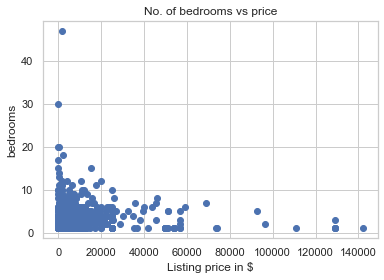

In [110]:
plt.scatter(rio_listings['price'],rio_listings['bedrooms'])
plt.ylabel('bedrooms')
plt.xlabel('Listing price in $')
plt.title('No. of bedrooms vs price')

In [112]:
rio_listings.drop(rio_listings.index[rio_listings['price'] == 650476], inplace=True)

Text(0.5, 1.0, 'No. of bedrooms vs price')

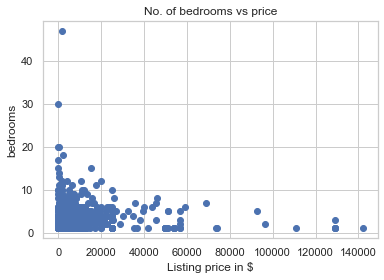

In [113]:
plt.scatter(rio_listings['price'],rio_listings['bedrooms'])
plt.ylabel('bedrooms')
plt.xlabel('Listing price in $')
plt.title('No. of bedrooms vs price')

Text(0.5, 0, 'Listing price in $')

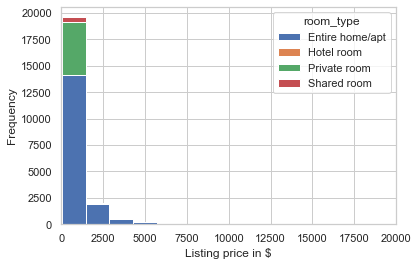

In [114]:
rio_listings.pivot(columns = 'room_type', values = 'price').plot.hist(stacked = True, bins=100)
plt.xlim(xmin=0, xmax = 20000)
plt.xlabel('Listing price in $')

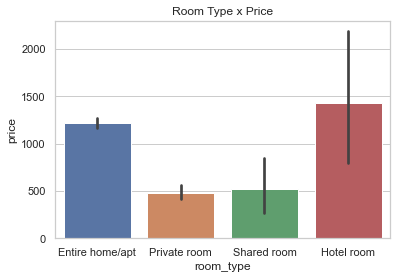

In [115]:
%matplotlib inline
ax = sns.barplot(x = "room_type", y = "price", data = rio_listings)
ax.set(title = "Room Type x Price")
ax = ax.get_figure()
figname = 'RoomType_Price.png'
ax.savefig(figname, dpi=100)

run.log(
        {"room_type x price": wandb.Image(figname)}
    )

plt.show()


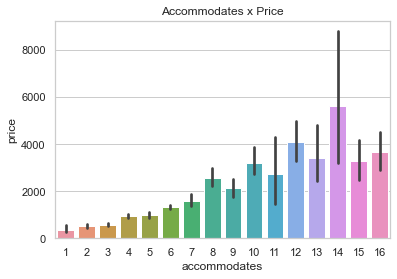

In [119]:
%matplotlib inline
ax = sns.barplot(x = "accommodates", y = "price", data = rio_listings)
ax.set(title = "Accommodates x Price")
ax = ax.get_figure()
figname = 'Accommodates_Price.png'
ax.savefig(figname, dpi=300)

run.log(
        {"accommodates x price": wandb.Image(figname)}
    )

plt.show()


### 1.4 Train & Split

In [130]:
splits = {}
splits["train"], splits["test"] = train_test_split(rio_listings,
                                                   test_size=0.30,
                                                   random_state=41)

In [131]:
# Save the artifacts. We use a temporary directory so we do not leave
# any trace behind

with tempfile.TemporaryDirectory() as tmp_dir:

    for split, rio_listings in splits.items():

        # Make the artifact name from the provided root plus the name of the split
        artifact_name = f"data_{split}.csv"

        # Get the path on disk within the temp directory
        temp_path = os.path.join(tmp_dir, artifact_name)

        # Save then upload to W&B
        rio_listings.to_csv(temp_path,index=False)

        artifact = wandb.Artifact(
            name=artifact_name,
            type="raw_data",
            description=f"{split} split of dataset week08_eda/raw_data.csv:latest",
        )
        artifact.add_file(temp_path)

        run.log_artifact(artifact)

        # This waits for the artifact to be uploaded to W&B. If you
        # do not add this, the temp directory might be removed before
        # W&B had a chance to upload the datasets, and the upload
        # might fail
        artifact.wait()

### 1.4.1 Donwload the train and test artifacts

In [133]:
# donwload the latest version of artifacts data_test.csv and data_train.csv
artifact_train = run.use_artifact("week08_eda/data_train.csv:latest")
artifact_test = run.use_artifact("week08_eda/data_test.csv:latest")

# create a dataframe from each artifact
rio_listings_train = pd.read_csv(artifact_train.file())
rio_listings_test  = pd.read_csv(artifact_test.file())

In [134]:
print("Train: {}".format(rio_listings_train.shape))
print("Test: {}".format(rio_listings_test.shape))

Train: (5155, 8)
Test: (2210, 8)


In [139]:
run.finish()